### Preludium

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Why do we use the neural nets?
...or any ML algorithm?

The simple answer is: **Function Approximation**

An unknown function `f` is sought so that `f(x) ~= y` for a number of input/output pairs `x,y`.
It can be simple as: `y = ax + b`. The parameters to be learned would be `a` and `b`.
For deep neural networks, we will have more complicated functions with more parameters.

In [ ]:
def f(x):
    return 3*x**2 - 4*x + 5

The above is the function (true function) which binds the `x` with its output `y`.

In [ ]:
f(3)

20

So, if we see its shape...

In [ ]:
x = np.arange(-10, 11)
y = list(map(f, x))

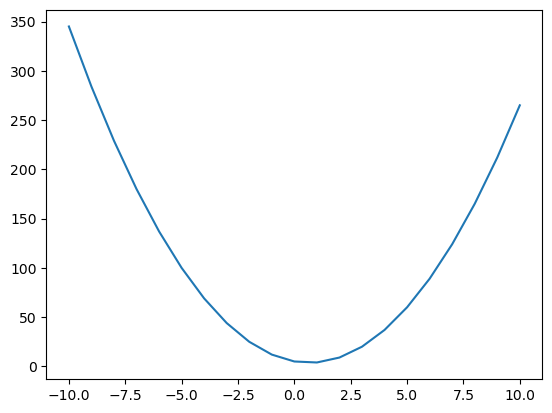

In [ ]:
plt.plot(x, y);

Now we would like to see: ***"What is the derivative of this function at any given point X?"***

> Which means, if we slightly change the value of our input X (say just 0.0001, plus or minus) then how does the function respond? Does its value go up or down and by how much?

In [ ]:
h = 0.001 # change by `h` - a (very) small number
x = 3
old = f(x)
new = f(x + h)

print("Old:", old)
print("New:", new)

Old: 20
New: 20.014003000000002


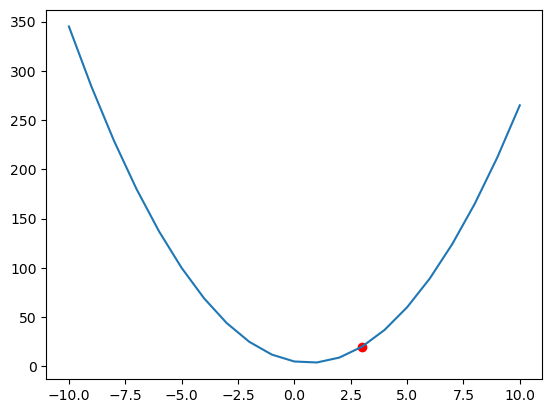

In [ ]:
X = np.arange(-10, 11)
Y = list(map(f, X))

plt.plot(X, Y)
plt.scatter(x, f(x), color="r");

In [ ]:
# This is the "change"
new - old

0.01400300000000243

In [ ]:
# This is the "slope" (normalized by the "h")
(new - old) / h

14.00300000000243

Say, now we are taking `-3` instead of `3` like above, then the slope would be?

In [ ]:
h = 0.001
x = -3
old = f(x)
new = f(x + h)

print("Old:", old)
print("New:", new)

Old: 44
New: 43.978003


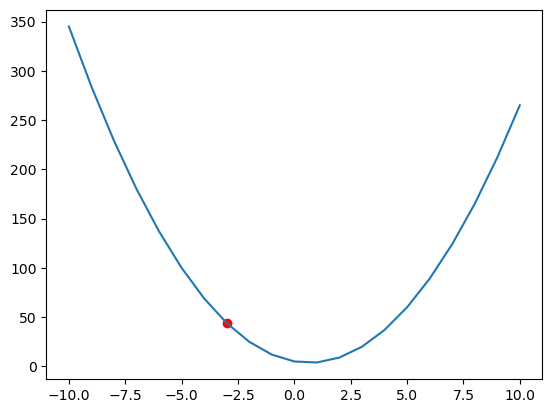

In [ ]:
X = np.arange(-10, 11)
Y = list(map(f, X))

plt.plot(X, Y)
plt.scatter(x, f(x), color="r");

In [ ]:
# This is the "change"
new - old

-0.021996999999998934

In [ ]:
# This is the "slope" (normalized by the "h")
(new - old) / h

-21.996999999998934

So at this particular point...

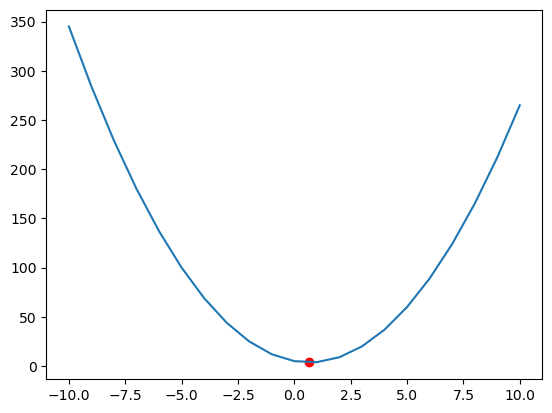

In [ ]:
x = np.arange(-10, 11)
y = list(map(f, x))

plt.plot(x, y)
plt.scatter(2/3, f(2/3), color="r");

In [ ]:
h = 0.001
x = 2/3
old = f(x)
new = f(x + h)

print("Old:", old)
print("New:", new)

Old: 3.666666666666667
New: 3.6666696666666665


In [ ]:
# This is the "change"
new - old

2.9999999995311555e-06

In [ ]:
# This is the "slope" (normalized by the "h")
(new - old) / h

0.0029999999995311555

Here the slope is `0.0`.

### Multiple Inputs

Unitl now we only had single input `x` where we saw how the function responds when a small change happens for a perticular value of `x`.

For NNs, there are so inputs in the function `f` where we need to find the slope of a function when one of the input changes — so we need to ***isolate*** the effect of the inputs.

In [ ]:
def f(a, b, c):
    return a*b + c

In [ ]:
a = 2.0
b = -3.0
c = 10.0

f(a, b, c)

4.0

Now let's start changing the value of `a` by `h`.

In [ ]:
h = 0.0001

old = f(a, b, c)
a += h
new = f(a, b, c)

# slope
(new - old) / h

-3.000000000010772

This means, when `b` and `c` are -3 and 10 respectively, and if `a` is 2, then if you change `a` by tiny amount then, the slope will be `-3.0`.

####  A calculus here?
Differentiating `a`, `b`, and `c` with respect to `a` gives the value of `b`. Which is -3.

In [ ]:
h = 0.0001

old = f(a, b, c)
b += h # Changing `b` value
new = f(a, b, c)

# slope
(new - old) / h

2.0001000000124947

It has a slope of `a`.

In [ ]:
h = 0.0001

old = f(a, b, c)
c += h # slight change in `c`
new = f(a, b, c)

# slope
(new - old) / h

0.9999999999976694

It has a slope of `1`.

#### 🤔 What is going on?
- `a` and `b` are closely related - so any change in either variable will lead to the change in the function of the other variable
- `c` is independent, any change in `c` will directly lead to that much change in the function without any multiplier. So, if we increase `c` by 1 then only 1 will be added to the function.
- If we change `a` by 1 then the change will be `1 * b` so, the change is `b` times.

#### For other inputs? 

In [ ]:
def f(a, b, c, d):
    return a*b*d + c

In [ ]:
a = 2.0
b = -3.0
c = 10.0
d = 5.0

f(a, b, c, d)

-20.0

In [ ]:
h = 0.0001

old = f(a, b, c, d)
a += h # slight change in `a`
new = f(a, b, c, d)

# slope
(new - old) / h

-15.000000000071623

In [ ]:
b * d

-15.0

In case of ***division***?

In [ ]:
def f(a, b, c, d):
    return (a*b)/d + c

In [ ]:
f(a, b, c, d)

8.79994

In [ ]:
h = 0.0001

old = f(a, b, c, d)
a += h # slight change in `a`
new = f(a, b, c, d)

# slope
(new - old) / h

-0.5999999999950489

In [ ]:
b / d

-0.6

👉 **Summary**:
- `*` and `/` are closely related operations: Variable slope (x resp. -1/x^2)
- `+` and `-` are independently related operations: Constant slope (1, resp. -1)

## The basics are done 🎉
We got some intuition on the slopes. Neural networks are just collections of such expressions. We calculate the derivatives (slopes) for each values for the unknown function `f` and we keep refining until we make the loss minimal.

To hold all of these expressions we need some kind of datastructure. 

In [ ]:
class Value:
    """
    This is the Value class which stores a python float
    and is able to perform addition, multiplication, divisions 
    and subtractions.
    
    But that is not it, it is the base for the neural net
    and will be also able to hold other operations such as
    backprop, forwardpass, activation functions etc.
    
    But this is just the first iteration so we will define
    the skeleton only.
    """
    
    def __init__(self, data):
        self.data = data
        
    def __repr__(self):
        return f"Value(data={self.data})"

In [ ]:
Value(1.2)

Value(data=1.2)

In [ ]:
class Value:
    """
    Adding ADDITION, SUBTRACTION, DIVISION, MULTIPLICATION
    """
    
    def __init__(self, data):
        self.data = data
        
    def __add__(self, other):
        return Value(self.data + other.data)
    
    def __truediv__(self, other):
        return Value(self.data / other.data)
    
    def __mul__(self, other):
        return Value(self.data * other.data)
    
    def __sub__(self, other):
        return Value(self.data - other.data)
        
    def __repr__(self):
        return f"Value(data={self.data})"

In [ ]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

a + b

Value(data=-1.0)

In [ ]:
a - b

Value(data=5.0)

In [ ]:
a * b

Value(data=-6.0)

In [ ]:
a / b

Value(data=-0.6666666666666666)

In [ ]:
a*b + c

Value(data=4.0)

Since we will be building the neural net, every value will also need pointers which can keep track of the values from which it has been computed.

For the example `a*b + c` we need to keep track of:
- a * b = -6
- (-6) + c = 4

In [ ]:
class Value:
    """
    Adding the children.
    First, when the Value will be initialized, there won't be any
    children.
    
    But after that, when we do the operation, the children will be
    populated and also then the _prev.
    """
    
    def __init__(self, data, _children=()):
        self.data = data
        self._prev = set(_children)
        
    def __add__(self, other):
        return Value(self.data + other.data, (self, other))
    
    def __truediv__(self, other):
        return Value(self.data / other.data, (self, other))
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other))
    
    def __sub__(self, other):
        return Value(self.data - other.data, (self, other))
        
    def __repr__(self):
        return f"Value(data={self.data})"

In [ ]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

d = a*b + c
d

Value(data=4.0)

In [ ]:
# Yes for now, we will need to access the `_prev` to see children
# we are not adding that in the __repr__ because we won't use it often
d._prev

{Value(data=-6.0), Value(data=10.0)}

We don't know ***what operation*** was used for `d`, so we will add that too.

In [ ]:
class Value:
    """
    Added the operation symbol and a label symbol
    """
    
    def __init__(self, data, _children=(), operation="", label=""):
        self.data = data
        self._prev = set(_children)
        self._operation = operation
        self._label = label
        
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __truediv__(self, other):
        return Value(self.data / other.data, (self, other), '/')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    
    def __sub__(self, other):
        return Value(self.data - other.data, (self, other), '-')
        
    def __repr__(self):
        return f"Value(data={self.data})"

In [ ]:
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")

d = a*b + c
d._label = "d"
d._prev, d._operation, d._label

({Value(data=-6.0), Value(data=10.0)}, '+', 'd')

# Visualizing the expression 

> 💡 ***NOTE:*** No need to understand the visualization code.

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f}" % (n._label, n.data), shape='record')
    if n._operation:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._operation, label = n._operation)
      # and connect this node to it
      dot.edge(uid + n._operation, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._operation)

  return dot

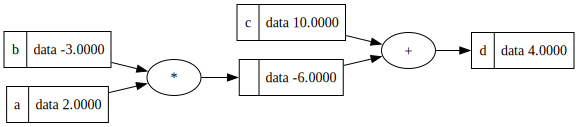

In [ ]:
draw_dot(d)

Let's simulate the loss value at the end

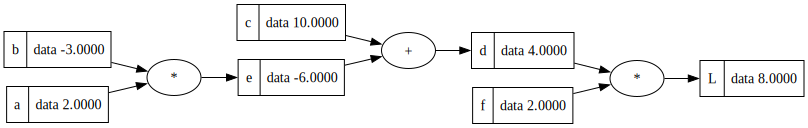

In [ ]:
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")

e = a*b
e._label = "e"

d = e + c
d._label = "d"

f = Value(2.0, label="f")
L = f * d
L._label = "L"
draw_dot(L)

### What did we do here?
This **was** the forward pass or call the "forward propogation". 

We begin with the starting nodes of the computational graph and propagate values to the end node.

### What is back propogation then?
It is the process of ***finding the gradient / slope / derivation*** for all intermediate values holding others constant. So, here in this case, we will be calculating the gradients for `a`, `b`, `c`, `d`, `e`, and `f` for the value `L`.

In [ ]:
class Value:
    """
    Adding the variable which keeps track of derivative / slope / gradient
    """
    
    def __init__(self, data, _children=(), operation="", label=""):
        self.data = data
        self._prev = set(_children)
        self._operation = operation
        self._label = label
        
        # because we assume that the value doesn't affect the 
        # loss function by default, thus the slope is 0.0
        self.grad = 0.0 
        
        
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __truediv__(self, other):
        return Value(self.data / other.data, (self, other), '/')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    
    def __sub__(self, other):
        return Value(self.data - other.data, (self, other), '-')
        
    def __repr__(self):
        return f"Value(data={self.data})"

In [ ]:
from graphviz import Digraph

""" JUST ADDING THE .grad TO THE VISUALIZATION"""
def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n._label, n.data, n.grad), shape='record')
    if n._operation:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._operation, label = n._operation)
      # and connect this node to it
      dot.edge(uid + n._operation, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._operation)

  return dot

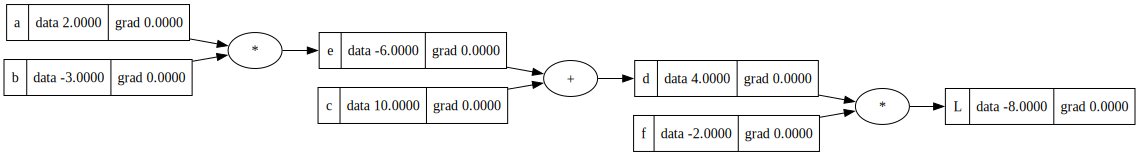

In [ ]:
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")

e = a*b
e._label = "e"

d = e + c
d._label = "d"

f = Value(-2.0, label="f")
L = f * d
L._label = "L"
draw_dot(L)

### Let's start BackProp

We will start by the right most Value, which is `L`. <br>
So the question:

> What is the gradient of `L` with respect to `L`?

It is `1`. Because the more you rise or drop L by unit 1, there will be gradient 1 only. It is not in relation with other variables which impacts the `L` so, 1 will be the answer.

Or, if I change `L` by some tiny value `h`, then how much will be the change in `L`? It is `h`. So, it is propotional and it will be `1`.

In mathematical notation, we have `\frac{\partial L}{\partial L} = 1`

In [ ]:
def cross_check():
    h = 0.0001
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c") 
    
    # Old operation
    e = a*b; e._label="e"
    d = e+c; d._label="d"
    f = Value(-2.0, label="f")
    L = f * d; L._label="L"
    old = L.data
    
    # New operation by changing one of the Values' value
    e = a*b; e._label="e"
    d = e+c; d._label="d"
    f = Value(-2.0, label="f")
    L = f * d; L._label="L"
    new = L.data + h
    
    return (new - old) / h

In [ ]:
cross_check()

0.9999999999976694

See? Now a change in `L` has a `1` slope.

## So, we will start by manually setting `grad` for L

### 1️⃣ Backprop Step - 1

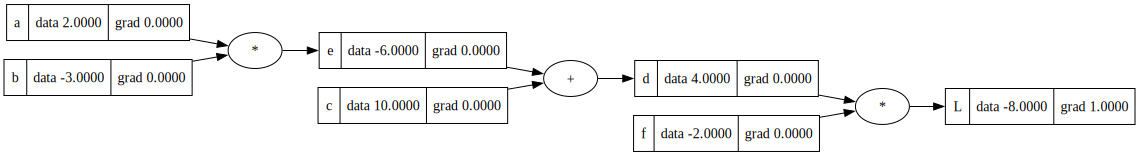

In [ ]:
L.grad = 1.0
draw_dot(L)

### 2️⃣ Backprop step - 2
Get the `grad` for L with respect to the change in the value `d` (one of two values from the last operation).

So:

- $L = d \times f$

Since, the sign is `*` or the **multiplication**, we know from our basics that, the slope is always **the same** as of the **other variable** for that operation.

#### Simple Rules of 👍
- If there is the sign `*` or `/` take the gradient the same as the other variable for that operation
- If there is the sign `+` or `-` take the gradient `1.0`

Please refer to the sections above to get the idea of what is going on. This is exactly the same here.

#### Mathematically...

We will get the derivation:
- Derivation of `L` / Derivation of `d` = ?

Which in words is:
> What is the derivation of loss "L" with respect to the derivation of "D"?

Mathematicall:
1.  $\text{slope} = (\text{new} - \text{old}) / h$
2. $= (f(d + h) - fd)) / h$
3. $=(fd + fh - fd) / h$
4. $=fh / h$
5. $= f$

> Don't confuse `f` here with the function `f()`, there was notation overbooking. Here I have used the variable `f`.

Thus, we will get the answer:
- Derivation of `L` / Derivation of `d` = `f`

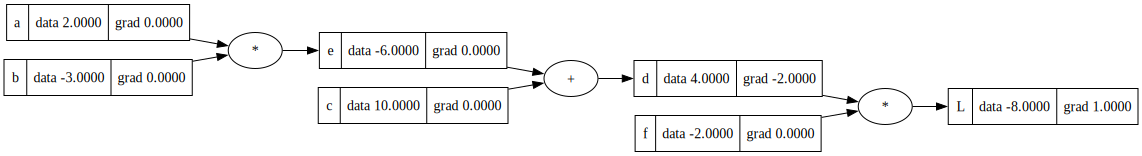

In [ ]:
# Since we are doing it manually, we need to keep it for now.
d.grad = f.data
draw_dot(L)

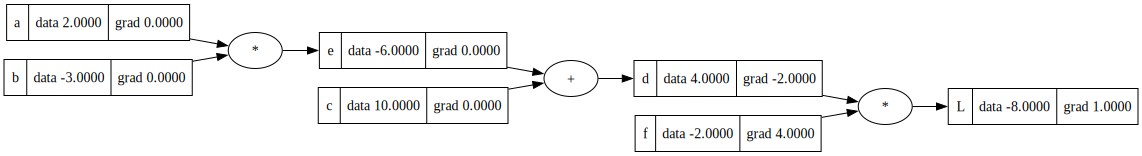

In [ ]:
# And the same for `f`
f.grad = d.data
draw_dot(L)

Check!

In [ ]:
def cross_check():
    h = 0.0001
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c") 
    
    # Old operation
    e = a*b; e._label="e"
    d = e+c; d._label="d"
    f = Value(-2.0, label="f")
    L = f * d; L._label="L"
    old = L.data
    
    # New operation by changing one of the Values' value
    e = a*b; e._label="e"
    d = e+c; d._label="d"
    d.data += h ### CHANGE IN `d`
    f = Value(-2.0, label="f")
    L = f * d; L._label="L"
    new = L.data
    
    return (new - old) / h

cross_check()

-1.9999999999953388

See! That's same as `f`.

### 3️⃣ Backprop Step - 3 

Okay, now we have to look for the `c` and `e`. **But wait** here we have the operation `+`. So, simply we would add `1.0` as the grad!!!

### But wait (again!)
Here, we are at the second last layer, so __`c` and `e` DON'T HAVE direct impact on `L`__. But they impact the `L` ___via___ `d` and `f`. So, here's the CHAIN RULE!

This would sound like a lot, but it is just the multiplication which we will see.  Since, the addition and subtraction always pass the values from the last layer, we would assign `1` there - but not directly!

In [ ]:
# Cross check it
def cross_check():
    h = 0.0001
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c") 
    
    # Old operation
    e = a*b; e._label="e"
    d = e+c; d._label="d"
    f = Value(-2.0, label="f")
    L = f * d; L._label="L"
    old = L.data
    
    # New operation by changing one of the Values' value
    e = a*b; e._label="e"
    c.data += h ### CHANGE IN `d`
    d = e+c; d._label="d"
    f = Value(-2.0, label="f")
    L = f * d; L._label="L"
    new = L.data
    
    return (new - old) / h

cross_check()

-1.9999999999953388

See, here we are getting the value `-2` which is the value of `d`'s grad.

<img src="./Images/BackProp.jpg">

A small explanation on why **just not the `1`** but `-2`?
- There will be `1.0` grad for `c` and `e` because there we have the the `+` operation
- They **don't have** a direct impact on `L` thus, we will apply the chain rule, which is just multiplying the grad of previous operation (here `d`)
- So, `1.0` * `-2.0` gives us `-2.0`.

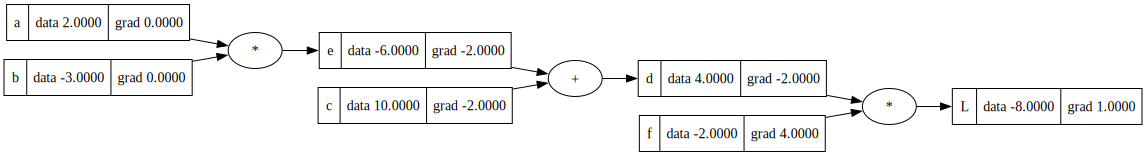

In [ ]:
# For `e` and `c`
e.grad = 1.0 * d.grad
c.grad = 1.0 * d.grad
draw_dot(L)

#### A proof?

We will get the derivation:
- Derivation of `d` / Derivation of `e` = ?

In Maths (for e):
1.  $\text{slope} = (\text{new} - \text{old}) / h$
2. $= (c + (e + h) - c+e)) / h$
3. $=h/ h$
4. $=1$

So...
- Derivation of `d` / Derivation of `e` = 1

### 4️⃣ Backprop Step - 4

Now we are at the stage where we need to find the grads for the `a` and `b`. But they have the `*` symbol and ***also*** we will have to apply the chain rule.

So, from our intuition, 
> If `a` and `b` are related by `*` operation, then `a` will get the grad of `b`'s data and vice versa.

And also the chain rule will apply, the "local" grads of `a` and `b` will be multiplied by the grad of `e` to apply the chain rule.

In [ ]:
a.grad = b.data * e.grad
b.grad = a.data * e.grad

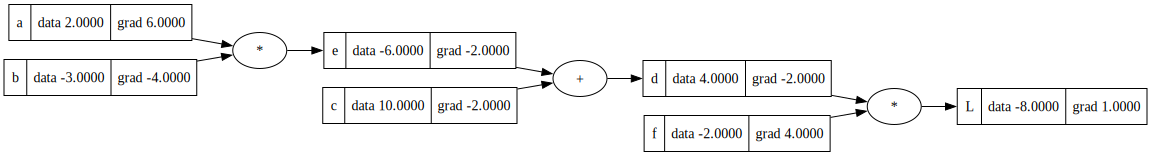

In [ ]:
draw_dot(L)

In [ ]:
# Cross check it
def cross_check():
    h = 0.0001
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c") 
    
    # Old operation
    e = a*b; e._label="e"
    d = e+c; d._label="d"
    f = Value(-2.0, label="f")
    L = f * d; L._label="L"
    old = L.data
    
    # New operation by changing one of the Values' value
    a.data += h ### CHANGE IN `a`
    e = a*b; e._label="e"
    d = e+c; d._label="d"
    f = Value(-2.0, label="f")
    L = f * d; L._label="L"
    new = L.data
    
    return (new - old) / h

cross_check()

6.000000000021544

In [ ]:
# Cross check it
def cross_check():
    h = 0.0001
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c") 
    
    # Old operation
    e = a*b; e._label="e"
    d = e+c; d._label="d"
    f = Value(-2.0, label="f")
    L = f * d; L._label="L"
    old = L.data
    
    # New operation by changing one of the Values' value
    b.data += h ### CHANGE IN `b`
    e = a*b; e._label="e"
    d = e+c; d._label="d"
    f = Value(-2.0, label="f")
    L = f * d; L._label="L"
    new = L.data
    
    return (new - old) / h

cross_check()

-4.000000000008441

Done!

We have done our first phase of the backprop manually.

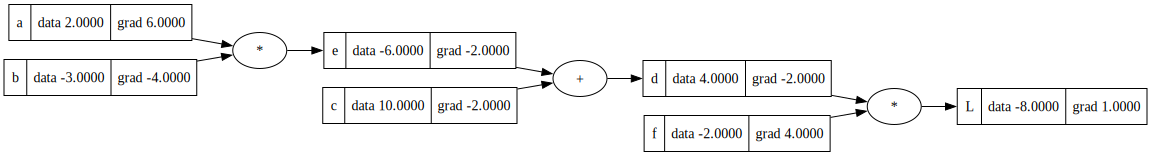

In [ ]:
draw_dot(L)

We will refine the weights - and then iterate over these multiple times to get the optimal parameters.